# Data Cleaning and Outlier Detection

The [original dataset](https://www.kaggle.com/datasets/kumargh/pimaindiansdiabetescsv) describes the medical records for Pima Indians
and whether or not each patient will have an onset of diabetes within 5 years.

**Here we use a modified version of the database to understand Data Cleaning better.**

Fields description follow:

* preg = Number of times pregnant
* plas = Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* pres = Diastolic blood pressure (mm Hg)
* skin = Triceps skin fold thickness (mm)
* test = 2-Hour serum insulin (mu U/ml)
* BMI = Body mass index (weight in kg/(height in m)^2)
* pedi = Diabetes pedigree function
* Age = Age (years)
* class = Class variable (1:tested positive for diabetes, 0: tested negative for diabetes)


In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('pima-indians-diabetes-modified.csv')
df

In [ ]:
df.columns

Index(['pregs', 'plas', 'pres', 'skin', 'test', 'BMI', 'pedi', 'Age', 'class'], dtype='object')

In [ ]:
# find columns with NaN values and number of NaN values
df.isna().sum()

pregs    0
plas     1
pres     2
skin     4
test     1
BMI      0
pedi     1
Age      0
class    1
dtype: int64

In [ ]:
# display rows with NaN values
df[df.isna().any(axis=1)]

,pregs,plas,pres,skin,test,BMI,pedi,Age,class
66,0,109.0,88.0,30.0,NaN,32.5,0.855,38,1.0
72,13,126.0,90.0,NaN,0.0,43.4,0.583,42,1.0
84,5,137.0,108.0,NaN,0.0,48.8,0.227,37,1.0
589,0,73.0,NaN,0.0,0.0,21.1,0.342,25,0.0
674,8,91.0,82.0,0.0,0.0,35.6,0.587,68,NaN
760,6,190.0,92.0,NaN,0.0,35.5,0.278,66,1.0
761,6,NaN,NaN,NaN,0.0,35.5,NaN,66,1.0


In [ ]:
print(df.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
766    False
767    False
768    False
769     True
770    False
Length: 771, dtype: bool


In [ ]:
print(df.duplicated().sum()) # Number of duplicate rows

2


In [ ]:
df[df.duplicated()] # duplicate rows

,pregs,plas,pres,skin,test,BMI,pedi,Age,class
755,8,154.0,78.0,32.0,0.0,32.4,0.443,45,1.0
769,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1.0


In [ ]:
df.drop_duplicates(inplace=True) # Remove duplicate rows, docs: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html

print(df.duplicated().sum()) # Number of duplicate rows

0


In [ ]:
print(df.duplicated().loc[754:])

754    False
756    False
757    False
758    False
759    False
760    False
761    False
762    False
763    False
764    False
765    False
766    False
767    False
768    False
770    False
dtype: bool


For cleaning values, we must take care of class variables first before any replacements.

In [ ]:
df['class'].unique()

array([1. , 0. , 2.5, nan, 4. , 3. ])

In [ ]:
df.dropna(subset = ['class'], inplace=True)
# Remove rows with NaN valued 'class' column
# docs: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html

In [ ]:
df['class'].unique()
# Sanity check

array([1. , 0. , 2.5, 4. , 3. ])

We also notice that class column has values other than 0 and 1, which is not allowed and we need to remove those as well.

In [ ]:
invalid_rows=df[(df['class'] != 0) & (df['class'] != 1)].index  # Alternate: df[~df['class'].isin([0, 1])].index
print(invalid_rows) # Indexes of invalid rows

df.drop(invalid_rows, inplace = True)

Int64Index([3, 696, 702], dtype='int64')


In [ ]:
df['class'].unique()


array([1., 0.])

Now we can impute/remove remaining NaN values as per need and later detect outliers

In [ ]:
# find rows with NaN values
df[df.isna().any(axis=1)]

,pregs,plas,pres,skin,test,BMI,pedi,Age,class
66,0,109.0,88.0,30.0,NaN,32.5,0.855,38,1.0
72,13,126.0,90.0,NaN,0.0,43.4,0.583,42,1.0
84,5,137.0,108.0,NaN,0.0,48.8,0.227,37,1.0
589,0,73.0,NaN,0.0,0.0,21.1,0.342,25,0.0
760,6,190.0,92.0,NaN,0.0,35.5,0.278,66,1.0
761,6,NaN,NaN,NaN,0.0,35.5,NaN,66,1.0


In [ ]:
nan_counts = df.isna().sum(axis=1)
total_columns = len(df.columns)-1 # exclude class column

threshold= 1/4 # 25%
print(nan_counts[nan_counts > total_columns*threshold].index) # row with more NaN values than allowed by threshold, here 25%

Int64Index([761], dtype='int64')


In [ ]:
df = df.drop(nan_counts[nan_counts > total_columns*threshold].index, axis=0)
# Drop rows for which more than threshold of the cells have NaN values

In [ ]:
# find rows with NaN values
df[df.isna().any(axis=1)]

,pregs,plas,pres,skin,test,BMI,pedi,Age,class
66,0,109.0,88.0,30.0,NaN,32.5,0.855,38,1.0
72,13,126.0,90.0,NaN,0.0,43.4,0.583,42,1.0
84,5,137.0,108.0,NaN,0.0,48.8,0.227,37,1.0
589,0,73.0,NaN,0.0,0.0,21.1,0.342,25,0.0
760,6,190.0,92.0,NaN,0.0,35.5,0.278,66,1.0


Now we fill the remaining NaN values(here with mean of the corresponding column)

In [ ]:
df.fillna(df.mean(),inplace=True)  # Replace NaN by mean values
print(df.isna().any(axis=1).sum()) # Total Nan Values

0


In [ ]:
df.sample(10) # 10 random rows from dataframe

,pregs,plas,pres,skin,test,BMI,pedi,Age,class
366,6,124.0,72.0,0.0,0.0,27.6,0.368,29,1.0
744,13,153.0,88.0,37.0,140.0,40.6,1.174,39,0.0
593,2,82.0,52.0,22.0,115.0,28.5,1.699,25,0.0
645,2,157.0,74.0,35.0,440.0,39.4,0.134,30,0.0
138,0,129.0,80.0,0.0,0.0,31.2,0.703,29,0.0
341,1,95.0,74.0,21.0,73.0,25.9,0.673,36,0.0
273,1,71.0,78.0,50.0,45.0,33.2,0.422,21,0.0
406,4,115.0,72.0,0.0,0.0,28.9,0.376,46,1.0
251,2,129.0,84.0,0.0,0.0,28.0,0.284,27,0.0
92,7,81.0,78.0,40.0,48.0,46.7,0.261,42,0.0


## Invalid Value Analysis

In [ ]:
# preg = Number of times pregnant
# plas = Plasma glucose concentration a 2 hours in an oral glucose tolerance test
# pres = Diastolic blood pressure (mm Hg)
# skin = Triceps skin fold thickness (mm)
# test = 2-Hour serum insulin (mu U/ml)
# BMI = Body mass index (weight in kg/(height in m)^2)
# pedi = Diabetes pedigree function
# Age = Age (years)
print(df.describe().loc[['min','max','count']])

       pregs   plas   pres   skin   test    BMI     pedi    Age  class
min      0.0    0.0    0.0    0.0    0.0    0.0    0.078   21.0    0.0
max     17.0  199.0  122.0   99.0  846.0   67.1    2.420   81.0    1.0
count  764.0  764.0  764.0  764.0  764.0  764.0  764.000  764.0  764.0


> plas, pres, skin, test and BMI **cannot be zero**. Hence we need to replace these values

> The imputation needs domain expertise in such cases to detect invalid values

In [ ]:
print((df==0).sum()) # values for each column which are 0

pregs    111
plas       5
pres      34
skin     223
test     371
BMI       11
pedi       0
Age        0
class    498
dtype: int64


In [ ]:
df.head()

,pregs,plas,pres,skin,test,BMI,pedi,Age,class
0,6,148.0,72.0,35.0,0.0,33.6,0.627,50,1.0
1,1,85.0,66.0,29.0,0.0,26.6,0.351,31,0.0
2,8,183.0,64.0,0.0,0.0,23.3,0.672,32,1.0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0
5,5,116.0,74.0,0.0,0.0,25.6,0.201,30,0.0


### Method 1:

> Treat 0s as NaN values and proceed with imputation with mean,median,etc

In [ ]:
features = ['pres','plas','skin','test','BMI']
df_imputed=df.copy()
for feature in features:
  df_imputed[feature].replace(0, df_imputed[feature].mean(), inplace=True)

print(df_imputed.describe().loc[['min','max','count']])

       pregs   plas   pres   skin   test    BMI     pedi    Age  class
min      0.0   44.0   24.0    7.0   14.0   18.2    0.078   21.0    0.0
max     17.0  199.0  122.0   99.0  846.0   67.1    2.420   81.0    1.0
count  764.0  764.0  764.0  764.0  764.0  764.0  764.000  764.0  764.0


# Method 2

> Binning based on a feature which is correctly valued. Taking average values of each incorrect valued feature in each bin and replace.

> https://devanshu125.github.io/diabetes/

In [ ]:
#df=df_imputed


## Outlier detection

Outliers are the values that do NOT satisfy the condition:
* (Q1 - (1.5 * IQR)) < x < (Q3 + (1.5 * IQR))

* Here x is the value of the attribute, IQR is the inter quartile range, Q1 and Q3 are the first and third quartiles

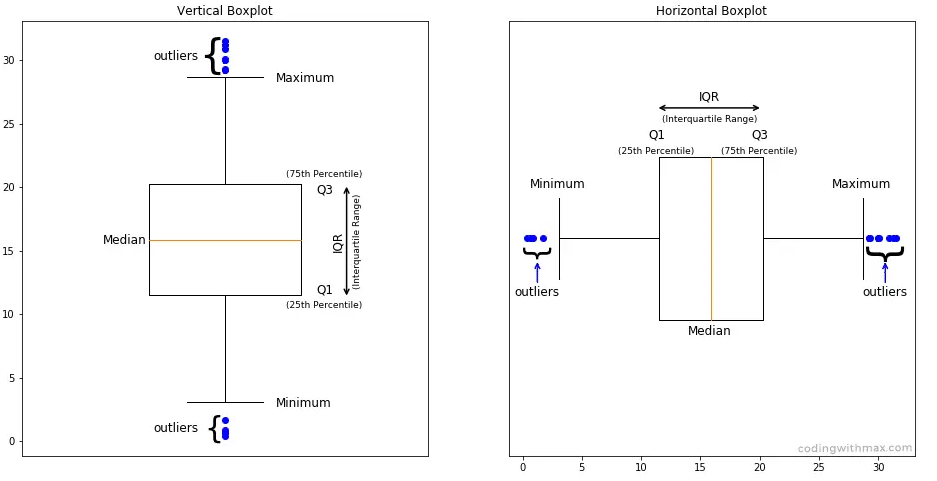

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# will lead to static images of plots embedded in the notebook

9


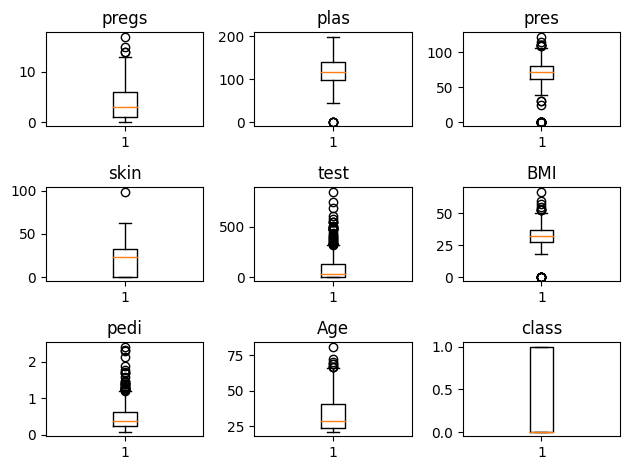

In [ ]:
n= len(cols)
print(n)  # 3*3
fig = plt.figure()

count=1
for col in cols:
    ax = fig.add_subplot(3,3,count)
    ax.boxplot(df[col])
    ax.set_title(col)
    count+=1
fig.tight_layout()
plt.show()


9


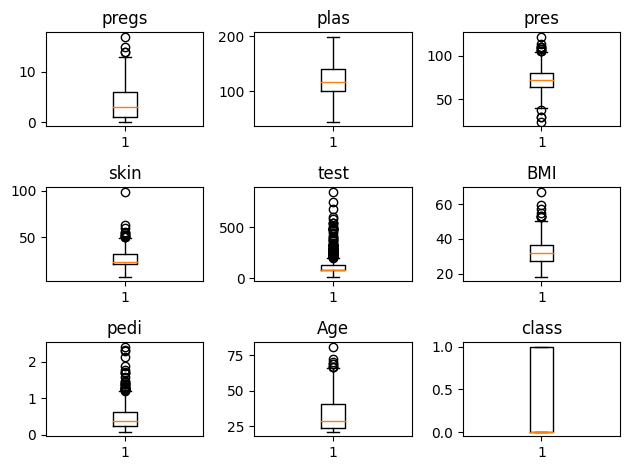

In [ ]:
n= len(cols)
print(n)  # 3*3
fig = plt.figure()
fig.tight_layout()

count=1
for col in cols:
    ax = fig.add_subplot(3,3,count)
    ax.boxplot(df_imputed[col])
    ax.set_title(col)
    count+=1
fig.tight_layout()
plt.show()


In [ ]:
# Plotting individually
# for col in cols:
#     plt.xlabel(col)
#     plt.ylabel('Values')
#     plt.boxplot(df[col])    # plotting individual column boxplots one by one
#     plt.show()              # showing them

In [ ]:
description=df_imputed.describe()
description

,pregs,plas,pres,skin,test,BMI,pedi,Age,class
count,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000
mean,3.848168,121.641694,72.229478,26.654249,118.900738,32.452368,0.471825,33.189791,0.348168
std,3.371764,30.378057,12.126282,9.630943,93.250175,6.889393,0.331534,11.695205,0.476702
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,20.632063,80.035387,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,80.035387,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,128.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
description=df_imputed.describe()
print('Outliers:\n')
for col in cols:
  outliers=[]
  lower_quartile=description[col]['25%']
  upper_quartile=description[col]['75%']
  inter_quartile_range = upper_quartile-lower_quartile
  for i in df_imputed[col]:   # With/After Imputation
    if(not (lower_quartile - 1.5*inter_quartile_range < i < upper_quartile +1.5*inter_quartile_range)):
      outliers.append(i)
  print(f'For {col}',outliers)

Outliers:

For pregs [15, 17, 14, 14]
For plas []
For pres [40.0, 30.0, 110.0, 108.0, 122.0, 30.0, 110.0, 104.0, 108.0, 104.0, 110.0, 24.0, 38.0, 106.0, 106.0, 106.0, 114.0]
For skin [60.0, 54.0, 51.0, 56.0, 50.0, 54.0, 50.0, 52.0, 63.0, 52.0, 99.0, 50.0]
For test [543.0, 846.0, 230.0, 235.0, 245.0, 207.0, 240.0, 300.0, 342.0, 304.0, 270.0, 228.0, 220.0, 495.0, 225.0, 325.0, 284.0, 204.0, 485.0, 285.0, 495.0, 210.0, 318.0, 280.0, 271.0, 478.0, 744.0, 370.0, 680.0, 402.0, 258.0, 375.0, 278.0, 545.0, 220.0, 360.0, 215.0, 205.0, 231.0, 255.0, 249.0, 325.0, 293.0, 465.0, 325.0, 285.0, 415.0, 275.0, 579.0, 310.0, 474.0, 210.0, 277.0, 210.0, 237.0, 328.0, 250.0, 480.0, 265.0, 210.0, 326.0, 210.0, 215.0, 225.0, 207.0, 215.0, 274.0, 330.0, 600.0, 230.0, 293.0, 272.0, 321.0, 440.0, 540.0, 231.0, 240.0, 265.0, 205.0, 480.0, 335.0, 387.0, 291.0, 392.0, 510.0]
For BMI [53.2, 55.0, 67.1, 52.3, 52.3, 52.9, 59.4, 57.3]
For pedi [2.288, 1.441, 1.39, 1.893, 1.781, 1.222, 1.4, 1.321, 1.224, 2.329, 1.318

In [ ]:
description=df.describe()
print('Outliers:\n')
for col in cols:
  outliers=[]
  lower_quartile=description[col]['25%']
  upper_quartile=description[col]['75%']
  inter_quartile_range = upper_quartile-lower_quartile
  for i in df[col]:   # Without/Before Imputation
    if(not (lower_quartile - 1.5*inter_quartile_range < i < upper_quartile +1.5*inter_quartile_range)):
      outliers.append(i)
  print(f'For {col}',outliers)

Outliers:

For pregs [15, 17, 14, 14]
For plas [0.0, 0.0, 0.0, 0.0, 0.0]
For pres [0.0, 0.0, 30.0, 110.0, 0.0, 0.0, 0.0, 0.0, 108.0, 122.0, 30.0, 0.0, 110.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 108.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 110.0, 24.0, 0.0, 0.0, 0.0, 0.0, 114.0, 0.0, 0.0, 0.0]
For skin [99.0]
For test [543.0, 846.0, 342.0, 495.0, 325.0, 485.0, 495.0, 478.0, 744.0, 370.0, 680.0, 402.0, 375.0, 545.0, 360.0, 325.0, 465.0, 325.0, 415.0, 579.0, 474.0, 328.0, 480.0, 326.0, 330.0, 600.0, 321.0, 440.0, 540.0, 480.0, 335.0, 387.0, 392.0, 510.0]
For BMI [0.0, 0.0, 0.0, 0.0, 53.2, 55.0, 0.0, 67.1, 52.3, 52.3, 52.9, 0.0, 0.0, 59.4, 0.0, 0.0, 57.3, 0.0, 0.0]
For pedi [2.288, 1.441, 1.39, 1.893, 1.781, 1.222, 1.4, 1.321, 1.224, 2.329, 1.318, 1.213, 1.353, 1.224, 1.391, 1.476, 2.137, 1.731, 1.268, 1.6, 2.42, 1.251, 1.699, 1.258, 1.282, 1.698, 1.461, 1.292, 1.394]
For Age [69, 67, 72, 81, 67, 67, 70, 69]
For class []


In [ ]:

# Method 2:
print('Outliers:')
for col in cols:
  lower_quartile=description[col]['25%']
  upper_quartile=description[col]['75%']
  inter_quartile_range = upper_quartile-lower_quartile
  series=df_imputed[col]
  lb=(series < (lower_quartile - 1.5*inter_quartile_range))
  ub=(series > (upper_quartile +1.5*inter_quartile_range))
  mask= lb | ub
  print(f'For {col}:')
  print(series[mask].values)
  print(list(series[mask].index))
  print()

Outliers:
For pregs:
[15 17 14 14]
[88, 159, 298, 455]

For plas:
[]
[]

For pres:
[ 30. 110. 108. 122.  30. 110. 108. 110.  24. 114.]
[18, 43, 84, 106, 125, 177, 362, 549, 597, 691]

For skin:
[99.]
[579]

For test:
[543. 846. 342. 495. 325. 485. 495. 478. 744. 370. 680. 402. 375. 545.
 360. 325. 465. 325. 415. 579. 474. 328. 480. 326. 330. 600. 321. 440.
 540. 480. 335. 387. 392. 510.]
[8, 13, 54, 111, 139, 153, 186, 220, 228, 231, 247, 248, 258, 286, 296, 360, 370, 375, 392, 409, 415, 480, 486, 519, 574, 584, 612, 645, 655, 695, 707, 710, 715, 754]

For BMI:
[53.2 55.  67.1 52.3 52.3 52.9 59.4 57.3]
[120, 125, 177, 193, 247, 303, 445, 673]

For pedi:
[2.288 1.441 1.39  1.893 1.781 1.222 1.4   1.321 1.224 2.329 1.318 1.213
 1.353 1.224 1.391 1.476 2.137 1.731 1.268 1.6   2.42  1.251 1.699 1.258
 1.282 1.698 1.461 1.292 1.394]
[4, 12, 39, 45, 58, 100, 147, 187, 218, 228, 243, 245, 259, 292, 308, 330, 370, 371, 383, 395, 445, 534, 593, 606, 618, 621, 622, 659, 661]

For Age:
[69 67 72 

# Resources
* https://pandas.pydata.org/docs/user_guide/index.html
* Deeper Analysis: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8943493/